<a href="https://colab.research.google.com/github/Cipe96/EEG-Recognition/blob/main/Analisi_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6>**EEg Recognition: Analisi Dataset**</font>
</br><font size=3>*Marco Cipollina, Riccardo Era*</font>


<font size=4>**Indice:**</font>
*   [Import librerie](#1)
*   [Downloads](#2)
*   [Analisi Dataset](#3)

<a name="1"></a>
# **Import librerie**

Iniziamo installando la libreria MNE, essenziale per l'analisi di dati EEG grazie alla sua gestione di file in formato EDF.

In [1]:
%%capture
# evita l' output a video
!pip install mne

Importiamo le librerie e montiamo Google Drive per garantire l'accesso agli altri file.

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
import pandas as pd
import numpy as np
import json
import sys
import mne
import os

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


<a name="2"></a>
# **Download**

In [4]:
#@title Percorso della cartella del progetto su Google Drive:

#@markdown Se la cartella del progetto si trova nella root di Drive, scrivere solo il suo nome:
PERCORSO_DRIVE = "EEG Recognition" #@param {type:"string"}

PERCORSO_DRIVE = '/content/drive/MyDrive/' + PERCORSO_DRIVE

In [5]:
sys.path.append(PERCORSO_DRIVE)                       # ci permetterà di importare le funzioni presenti in altri file
from shared_utilities import download_dataset

Scarichiamo dal file "EEG_Motor_Movement-Imagery_R01_ID.json" l'ID necessario per il download del dataset.

In [6]:
with open(PERCORSO_DRIVE + '/EEG_Motor_Movement-Imagery_R01_ID.json', 'r') as file:
  config = json.load(file)

DATASET_ID = config['DATASET_ID']

In [7]:
#@title Impostazioni download

#@markdown Nome del zip dataset post download:
DATASET_NAME = 'EEG_Motor_Movement-Imagery.zip' #@param {type:"string"}

download_dataset(DATASET_ID, DATASET_NAME, msg=True)

Downloading...
From (original): https://drive.google.com/uc?id=1WwuAh25Jfx-I8rY3vFGyXiI79YfLYUpH
From (redirected): https://drive.google.com/uc?id=1WwuAh25Jfx-I8rY3vFGyXiI79YfLYUpH&confirm=t&uuid=e6bfc62e-8e6d-4c3b-9ecc-3ccca64d8f5f
To: /content/EEG_Motor_Movement-Imagery.zip
100%|██████████| 76.6M/76.6M [00:03<00:00, 21.9MB/s]


File scaricato e salvato come EEG_Motor_Movement-Imagery.zip!



Dopo aver scaricato il dataset lo unzippiamo ed eliminiamo i file txt e la cartella sample_data creata automaticamente da Colab.

In [8]:
%%capture

! unzip "{DATASET_NAME}"              # unzippa il file zip
! rm /content/AMSL/*.txt              # elimina i file txt
! rm -r /content/sample_data          # elimina la cartella di default di Colab

<a name="3"></a>
# **Analisi Dataset**

## Numero di classi

Dato che il nostro dataset è composto da una sola sessione per ciascuno volontario, ognuno dei quali rappresenta una "classe", possiamo esplicitare il numero delle classi listando tutti i file .edf nella directory assegnado un'etichetta univoca a ciascuno:

In [9]:
dataset_path = '/content/EEG_T0/'
files = sorted(os.listdir(dataset_path))
classi = [f'{i+1}' for i in range(len(files))]
print(f"Numero di classi (volontari): {len(classi)}")

Numero di classi (volontari): 109


## Campioni per classe

Utilizziamo una funzione della libreria MNE per ricavare il numero di campioni presenti per ogni specifico EEG relativo ai diversi volonari.

In [10]:
%%capture
campioni_per_classe = {}
for i, file in enumerate(files):
    raw_data = mne.io.read_raw_edf(f"{dataset_path}/{file}", preload=True, verbose = 'CRITICAL')
    campioni_per_classe[classi[i]] = raw_data.n_times

In [11]:
print("Numero di campioni per classe:", campioni_per_classe)

Numero di campioni per classe: {'1': 9760, '2': 9760, '3': 9760, '4': 9760, '5': 9760, '6': 9760, '7': 9760, '8': 9760, '9': 9760, '10': 9760, '11': 9760, '12': 9760, '13': 9760, '14': 9600, '15': 9760, '16': 9760, '17': 9760, '18': 9760, '19': 9760, '20': 9760, '21': 9760, '22': 9760, '23': 9760, '24': 9760, '25': 9760, '26': 9760, '27': 9760, '28': 9760, '29': 9760, '30': 9760, '31': 9760, '32': 9760, '33': 9760, '34': 9760, '35': 9760, '36': 9760, '37': 9760, '38': 9760, '39': 9760, '40': 9760, '41': 9760, '42': 9760, '43': 9760, '44': 9760, '45': 9760, '46': 9760, '47': 9760, '48': 9760, '49': 9760, '50': 9760, '51': 9600, '52': 9760, '53': 9760, '54': 9760, '55': 9760, '56': 9760, '57': 9760, '58': 9760, '59': 9760, '60': 9760, '61': 9760, '62': 9760, '63': 9760, '64': 9760, '65': 9760, '66': 9760, '67': 9760, '68': 9760, '69': 9600, '70': 9760, '71': 9760, '72': 9760, '73': 9760, '74': 9760, '75': 9760, '76': 9760, '77': 9760, '78': 9760, '79': 9760, '80': 9760, '81': 9760, '82':

Dalle informazioni raccolte costruiamo un bar plot per verificare il bilanciamento di campioni per classe.

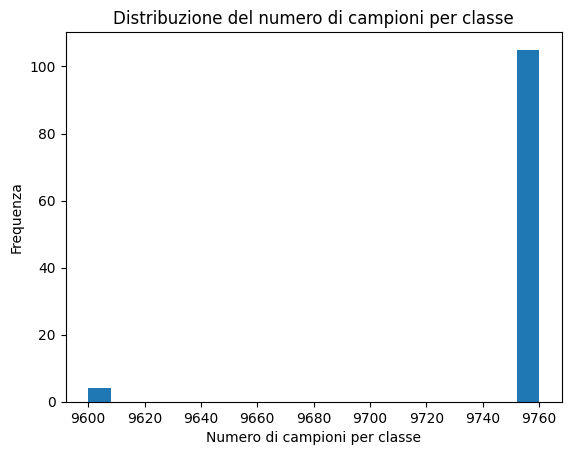

Media dei campioni per classe: 9754.13


In [12]:
# Lista dei campioni per ogni volontario
counts = list(campioni_per_classe.values())
plt.hist(counts, bins=20)
plt.xlabel("Numero di campioni per classe")
plt.ylabel("Frequenza")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

# Analisi di bilanciamento
media_campioni = sum(counts) / len(counts)
print(f"Media dei campioni per classe: {media_campioni:.2f}")


In [13]:
# Conta le occorrenze di ciascun numero di campioni
conteggio_campioni = Counter(campioni_per_classe.values())

# Stampa il numero di classi per ciascun numero di campioni
for numero_campioni, numero_classi in conteggio_campioni.items():
    print(f"{numero_classi} classi hanno {numero_campioni} campioni")

105 classi hanno 9760 campioni
4 classi hanno 9600 campioni


Come possiamo notare prima visivamente e poi nel dettaglio, il nostro dataset risulta essere molto bilanciato fra le varie classi

# Pre-processing

In [20]:
train = []
label_tr = []
val = []
label_val = []
test = []
label_ts = []
classe = 0

# Patch length --> 240 samples == 1.5 second

l_patch = 240

# Split into 5 frequency bands

high = {'alpha' : 13, 'beta' : 30, 'delta' : 4, 'gamma' : 40, 'theta' : 8, 'broadband' : None } # High frequencies
low = {'alpha' : 8, 'beta' : 13, 'delta' : 0.5, 'gamma' : 30, 'theta' : 4, 'broadband' : 0.5 } # Low frequencies

ntr = 28 # train set window
nvd = 6 # validation set window
nts = 6 # test set window

for eeg in files[:len(classi)]:

  raw = mne.io.read_raw_edf(input_fname = '/content/EEG_T0/'+eeg, preload = True, verbose = 'CRITICAL')
  raw.filter(l_freq = low['broadband'], h_freq = high['broadband'], n_jobs = 8, verbose = 'CRITICAL')
  rec = raw.get_data()
  h=0

  while(h < l_patch*ntr):
    train.append(rec[:,h:h+l_patch]) # train set
    label_tr.append(classe)
    h=h+l_patch

  # RICORDA DI FARE EARLY STOP     D O P O
  while(h < (ntr+nvd)*l_patch):
    val.append(rec[:,h:h+l_patch]) # validation set
    label_val.append(classe)
    h=h+l_patch

  while(h < l_patch*(ntr+nvd+nts) and h + l_patch <= rec.shape[1]):
    test.append(rec[:,h:h+l_patch]) # test set
    label_ts.append(classe)
    h=h+l_patch

  classe = classe + 1


In [23]:
train_array = np.array(train)  # Converti la lista train in un array NumPy
print(train_array.shape)
val_array = np.array(val)  # Converti la lista train in un array NumPy
print(val_array.shape)
test_array = np.array(test)  # Converti la lista train in un array NumPy
print(test_array.shape)

label_tr = np.array(label_tr)
print(label_tr.shape)
label_val = np.array(label_val)
print(label_val.shape)
label_ts = np.array(label_ts)
print(label_ts.shape)
print(rec.shape)

(3052, 64, 240)
(654, 64, 240)
(654, 64, 240)
(3052,)
(654,)
(654,)
(64, 9600)


(9600 * 240) / 109 = 4360 /n
4360 * 0.7 = 3052 /n
4360 * 0.15 = 654

# Modello

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Supponiamo che train_array, val_array, test_array, label_tr, label_val, label_ts siano già definiti come array numpy
# Converti le etichette in one-hot encoding
num_classes = len(np.unique(label_tr))
print("Numero di classi:", num_classes)
y_train = tf.keras.utils.to_categorical(label_tr, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(label_val, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(label_ts, num_classes=num_classes)

# Trasponi i dati per renderli compatibili con LSTM
train_array = train_array.transpose(0, 2, 1)  # Diventa (num_segments, 240, 64)
val_array = val_array.transpose(0, 2, 1)
test_array = test_array.transpose(0, 2, 1)

# Calcola la media e la deviazione standard sul training set dopo la trasposizione
mean = train_array.mean(axis=(0, 1), keepdims=True)  # Media calcolata sui segmenti e sui campioni temporali per ogni canale
std = train_array.std(axis=(0, 1), keepdims=True)    # Deviazione standard calcolata sui segmenti e campioni temporali per ogni canale

# Normalizza il training set
train_array = (train_array - mean) / std

# Applica la stessa normalizzazione a validation e test set
val_array = (val_array - mean) / std
test_array = (test_array - mean) / std

Numero di classi: 109


In [25]:
print(train_array.shape)

print(val_array.shape)

print(test_array.shape)

print(label_tr.shape)
print(label_val.shape)
print(label_ts.shape)
print(rec.shape)

(3052, 240, 64)
(654, 240, 64)
(654, 240, 64)
(3052,)
(654,)
(654,)
(64, 9600)


In [26]:
# Definisci il modello
model = Sequential()
model.add(LSTM(128, input_shape=(train_array.shape[1], train_array.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compila il modello
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Addestra il modello
model.fit(train_array, y_train, epochs=100, batch_size=32, validation_data=(val_array, y_val))

# Valuta il modello
loss, accuracy = model.evaluate(test_array, y_test, verbose=0)
print(f'Accuratezza sul test: {accuracy:.4f}')


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0101 - loss: 4.7218 - val_accuracy: 0.0428 - val_loss: 4.6071
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0487 - loss: 4.5128 - val_accuracy: 0.0581 - val_loss: 4.3174
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0755 - loss: 4.2049 - val_accuracy: 0.0810 - val_loss: 4.2404
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0943 - loss: 4.0523 - val_accuracy: 0.0841 - val_loss: 3.9651
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1257 - loss: 3.8657 - val_accuracy: 0.0979 - val_loss: 3.8530
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1377 - loss: 3.6830 - val_accuracy: 0.1009 - val_loss: 3.8177
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1528 - loss: 3.6097 - val_accuracy: 0.0994 - val_loss: 4.0249
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1498 - loss: 3.6660 - val_accuracy: 0.